### Background

RNA-Sequencing is a high-throughput method for gene expression profiling - measuring the expression of genes in a sample and revealing the presence and quantity of RNA in a biological sample. In the context of cancer, gene expression profiling can also be used to more accurately classify tumors and understand the heterogeneity within a cancer type. 

In this assignment, we will work with a gene expression dataset of Pancreatic Adenocarcinoma. Pancreatic Adenocarcinoma (PAAD) is the third most common cause of death from cancer, with an overall 5-year survival rate of less than 5%, and is predicted to become the second leading cause of cancer mortality in the United States by 2030.

### Tasks 
1. Data cleaning and checking distribution of gene expression across samples
2. Run PCA and figure out two types of tumors present.
3. Understand the effect of Interferons in Pancreatic Adenocarcinoma.

In [1]:
## Importing neccessary packages
import cmapPy.pandasGEXpress.parse_gct as pg
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.decomposition import PCA

In [57]:
### Using cmapPy to parse the gct file provided
obj = pg.parse('Copy of PAAD.gct')

### Task 1 

In [58]:
## original dataframe
orig_df = obj.data_df
orig_df.head()

cid    aab1-Primary solid Tumor  aab4-Primary solid Tumor  \
rid                                                         
A1BG                        6.4                       5.8   
A1CF                        4.7                       5.7   
A2BP1                      -1.0                       1.1   
A2LD1                       7.5                       6.8   
A2ML1                       6.4                       NaN   

cid    aab6-Primary solid Tumor  aab8-Primary solid Tumor  \
rid                                                         
A1BG                        6.4                       5.8   
A1CF                        3.0                       5.1   
A2BP1                       NaN                       NaN   
A2LD1                       7.3                       7.5   
A2ML1                      10.8                       4.1   

cid    aab9-Primary solid Tumor  aaba-Primary solid Tumor  \
rid                                                         
A1BG                        6.7                       6.6   
A1CF                        4.4                       4.2   
A2BP1                       0.1                       NaN   
A2LD1                       7.4                       6.6   
A2ML1                       9.3                       9.8   

cid    aabe-Primary solid Tumor  aabf-Primary solid Tumor  \
rid                                                         
A1BG                        6.3                       6.5   
A1CF                        1.6                       6.8   
A2BP1                       NaN                       1.7   
A2LD1                       7.1                       6.8   
A2ML1                       6.2                       3.8   

cid    aabh-Primary solid Tumor  aabi-Primary solid Tumor  ...  \
rid                                                        ...   
A1BG                        5.7                       6.3  ...   
A1CF                        6.0                       NaN  ...   
A2BP1                       0.4                      -1.5  ...   
A2LD1                       8.0                       5.8  ...   
A2ML1                       2.3                      10.1  ...   

cid    aauh-Primary solid Tumor  aaui-Primary solid Tumor  \
rid                                                         
A1BG                        7.1                       7.1   
A1CF                        5.4                       6.4   
A2BP1                       3.5                       1.3   
A2LD1                       6.5                       7.3   
A2ML1                       0.1                       3.4   

cid    aaul-Primary solid Tumor  a8t3-Primary solid Tumor  \
rid                                                         
A1BG                        6.7                       7.0   
A1CF                        6.5                       4.4   
A2BP1                      -0.3                       NaN   
A2LD1                       6.1                       6.7   
A2ML1                       3.7                      -0.9   

cid    a8t5-Primary solid Tumor  a89d-Solid Tissue Normal  \
rid                                                         
A1BG                        6.9                       7.1   
A1CF                        3.3                       3.6   
A2BP1                       2.1                       2.0   
A2LD1                       6.5                       6.7   
A2ML1                       3.6                       1.0   

cid    a89d-Primary solid Tumor  a8sy-Primary solid Tumor  \
rid                                                         
A1BG                        7.3                       7.9   
A1CF                        6.2                       1.2   
A2BP1                       0.0                       NaN   
A2LD1                       6.7                       6.5   
A2ML1                       2.8                      10.5   

cid    a8lh-Primary solid Tumor  aapl-Primary solid Tumor  
rid                                                  

In [59]:
orig_df.shape

(18465, 183)

Dataframe is oriented such that the genes are rows and samples are columns. Total samples are 183 and total genes are 18465.

In [60]:
## Rows with NaN dropped

data_df = orig_df.dropna()

In [61]:
data_df.shape

(14098, 183)

#### Answer to Question 1 - 

Total number of rows with atleast one NaN = 4367

#### Boxplot per gene sample

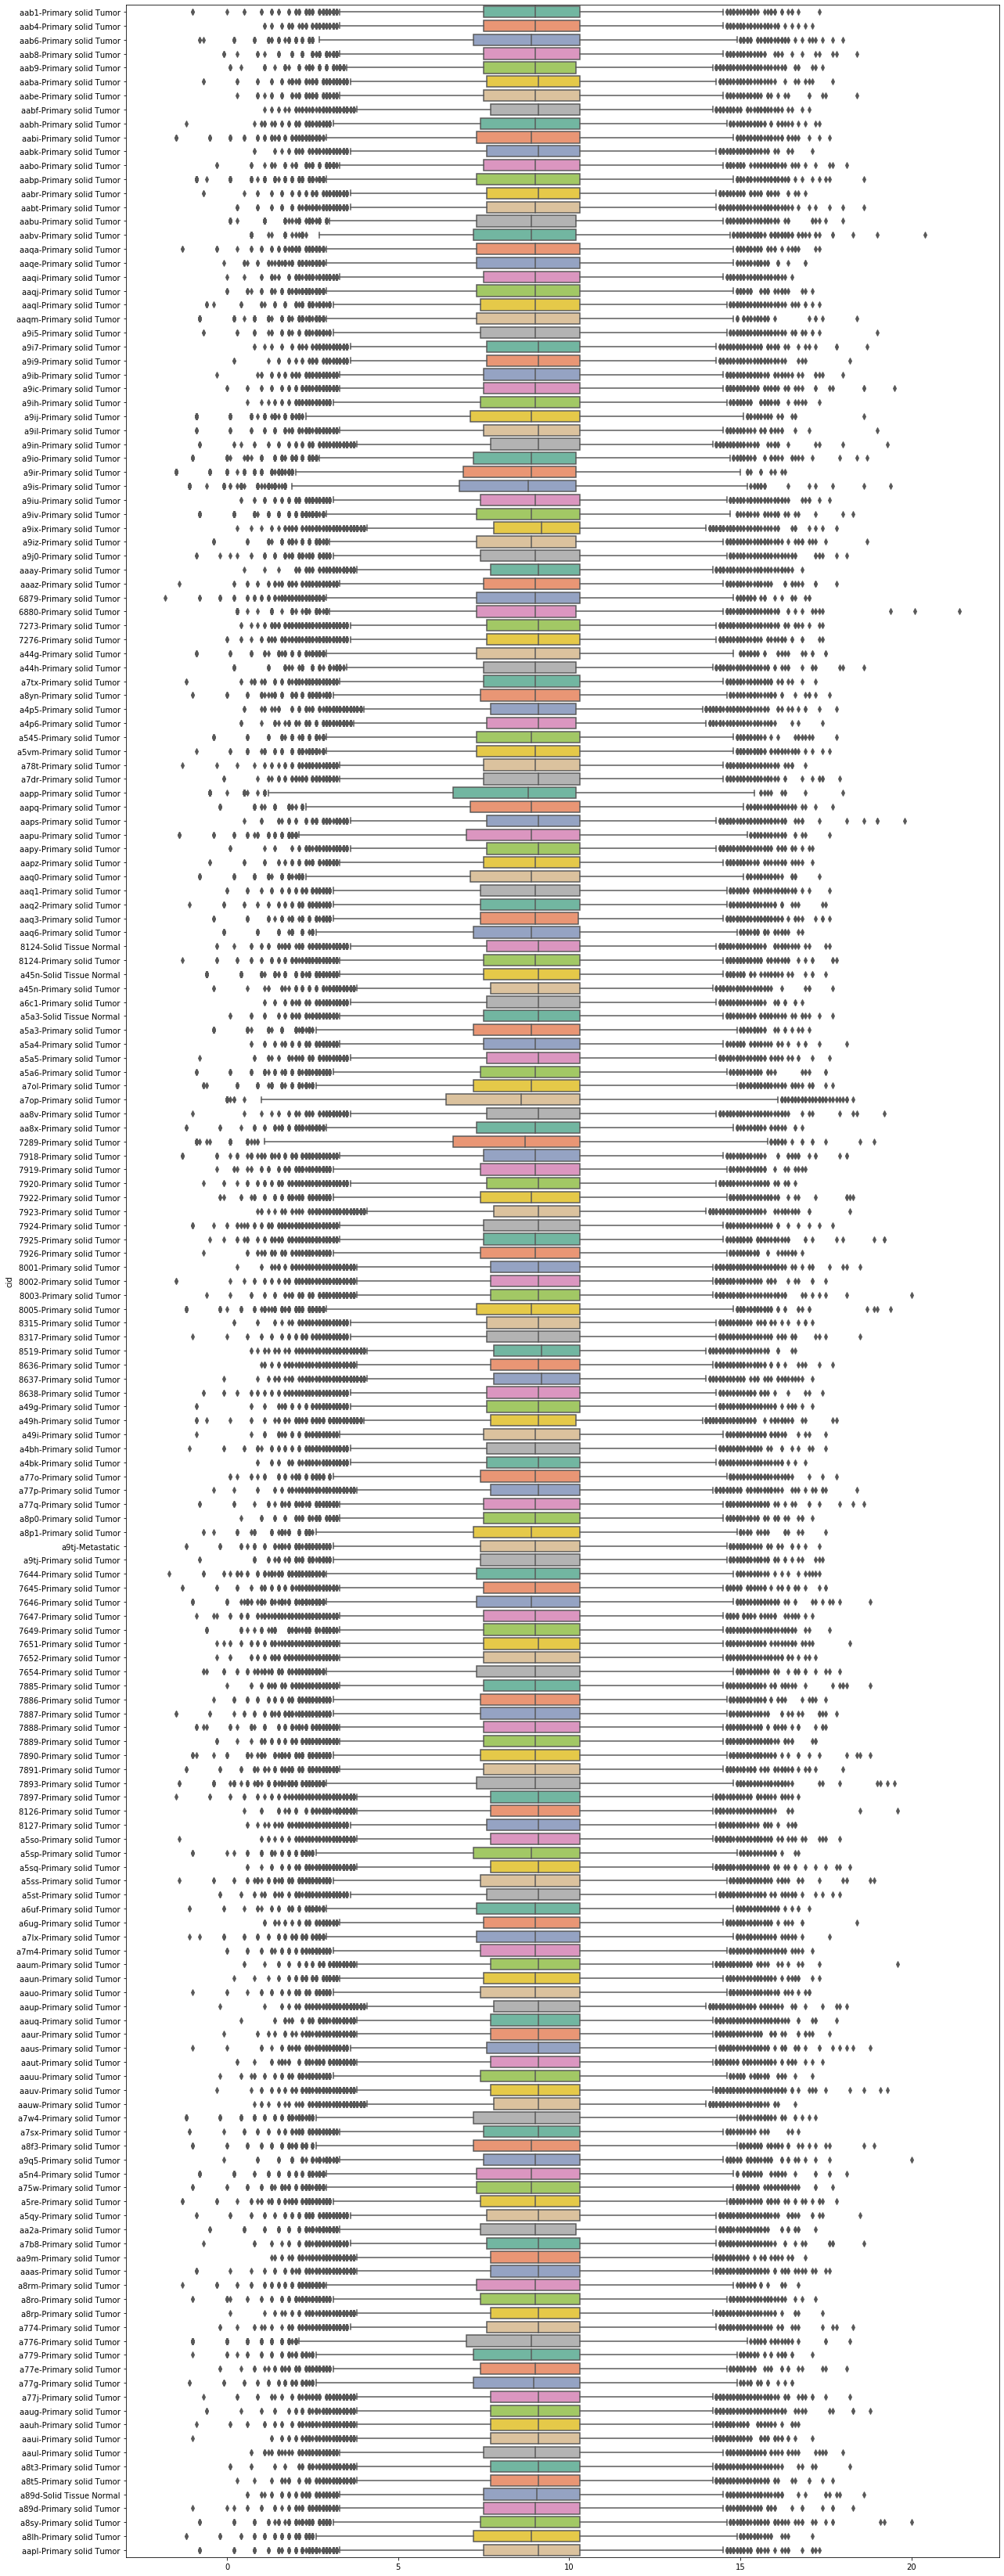

In [62]:

fig, ax = pyplot.subplots(figsize=(20,60))
box_plots = sns.boxplot(data=data_df,orient='h',palette="Set2",ax=ax)

In [64]:
### Saving figure to a file
my_fig = box_plots.get_figure()
my_fig.savefig("Distribution of genes per sample.png")

In [65]:
data_df.describe()

cid    aab1-Primary solid Tumor  aab4-Primary solid Tumor  \
count              14098.000000              14098.000000   
mean                   8.800709                  8.844213   
std                    2.244135                  2.170638   
min                   -1.000000                  1.100000   
25%                    7.500000                  7.500000   
50%                    9.000000                  9.000000   
75%                   10.300000                 10.300000   
max                   17.299999                 17.100000   

cid    aab6-Primary solid Tumor  aab8-Primary solid Tumor  \
count              14098.000000              14098.000000   
mean                   8.667988                  8.783005   
std                    2.445135                  2.227421   
min                   -0.800000                 -0.100000   
25%                    7.200000                  7.500000   
50%                    8.900000                  9.000000   
75%                   10.300000                 10.300000   
max                   18.000000                 18.400000   

cid    aab9-Primary solid Tumor  aaba-Primary solid Tumor  \
count              14098.000000              14098.000000   
mean                   8.816753                  8.818840   
std                    2.195194                  2.184620   
min                    0.100000                 -0.700000   
25%                    7.500000                  7.600000   
50%                    9.000000                  9.100000   
75%                   10.200000                 10.300000   
max                   17.400000                 17.700001   

cid    aabe-Primary solid Tumor  aabf-Primary solid Tumor  \
count              14098.000000              14098.000000   
mean                   8.786849                  8.951547   
std                    2.239195                  2.064965   
min                    0.300000                  1.100000   
25%                    7.500000                  7.700000   
50%                    9.000000                  9.100000   
75%                   10.300000                 10.300000   
max                   18.400000                 17.000000   

cid    aabh-Primary solid Tumor  aabi-Primary solid Tumor  ...  \
count              14098.000000              14098.000000  ...   
mean                   8.781955                  8.690552  ...   
std                    2.270071                  2.424452  ...   
min                   -1.200000                 -1.500000  ...   
25%                    7.400000                  7.300000  ...   
50%                    9.000000                  8.900000  ...   
75%                   10.300000                 10.300000  ...   
max                   17.299999                 17.600000  ...   

cid    aauh-Primary solid Tumor  aaui-Primary solid Tumor  \
count              14098.000000              14098.000000   
mean                   8.899625                  8.894319   
std                    2.087420                  2.132156   
min                   -0.900000                 -1.000000   
25%                    7.700000                  7.700000   
50%                    9.100000                  9.100000   
75%                   10.300000                 10.300000   
max                   16.700001                 17.100000   

cid    aaul-Primary solid Tumor  a8t3-Primary solid Tumor  \
count              14098.000000              14098.000000   
mean                   8.796885                  8.901723   
std                    2.256206                  2.130388   
min                    0.700000                  0.100000   
25%                    7.500000                  7.700000   
50%                    9.000000                  9.100000   
75%                   10.300000                 10.300000   
max                   18.000000                 18.200001   

cid    a8t5-Primary solid Tumor  a89d-Solid Tissue Normal  \
count              14098.000000             

#### Boxplot of all the values

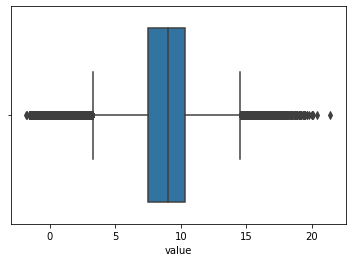

In [67]:
boxplot_all = sns.boxplot(pd.melt(data_df)['value'])
my_fig = boxplot_all.get_figure()
my_fig.savefig("Distribution of the given data.png")

In [11]:
#### Histogram distribution per sample

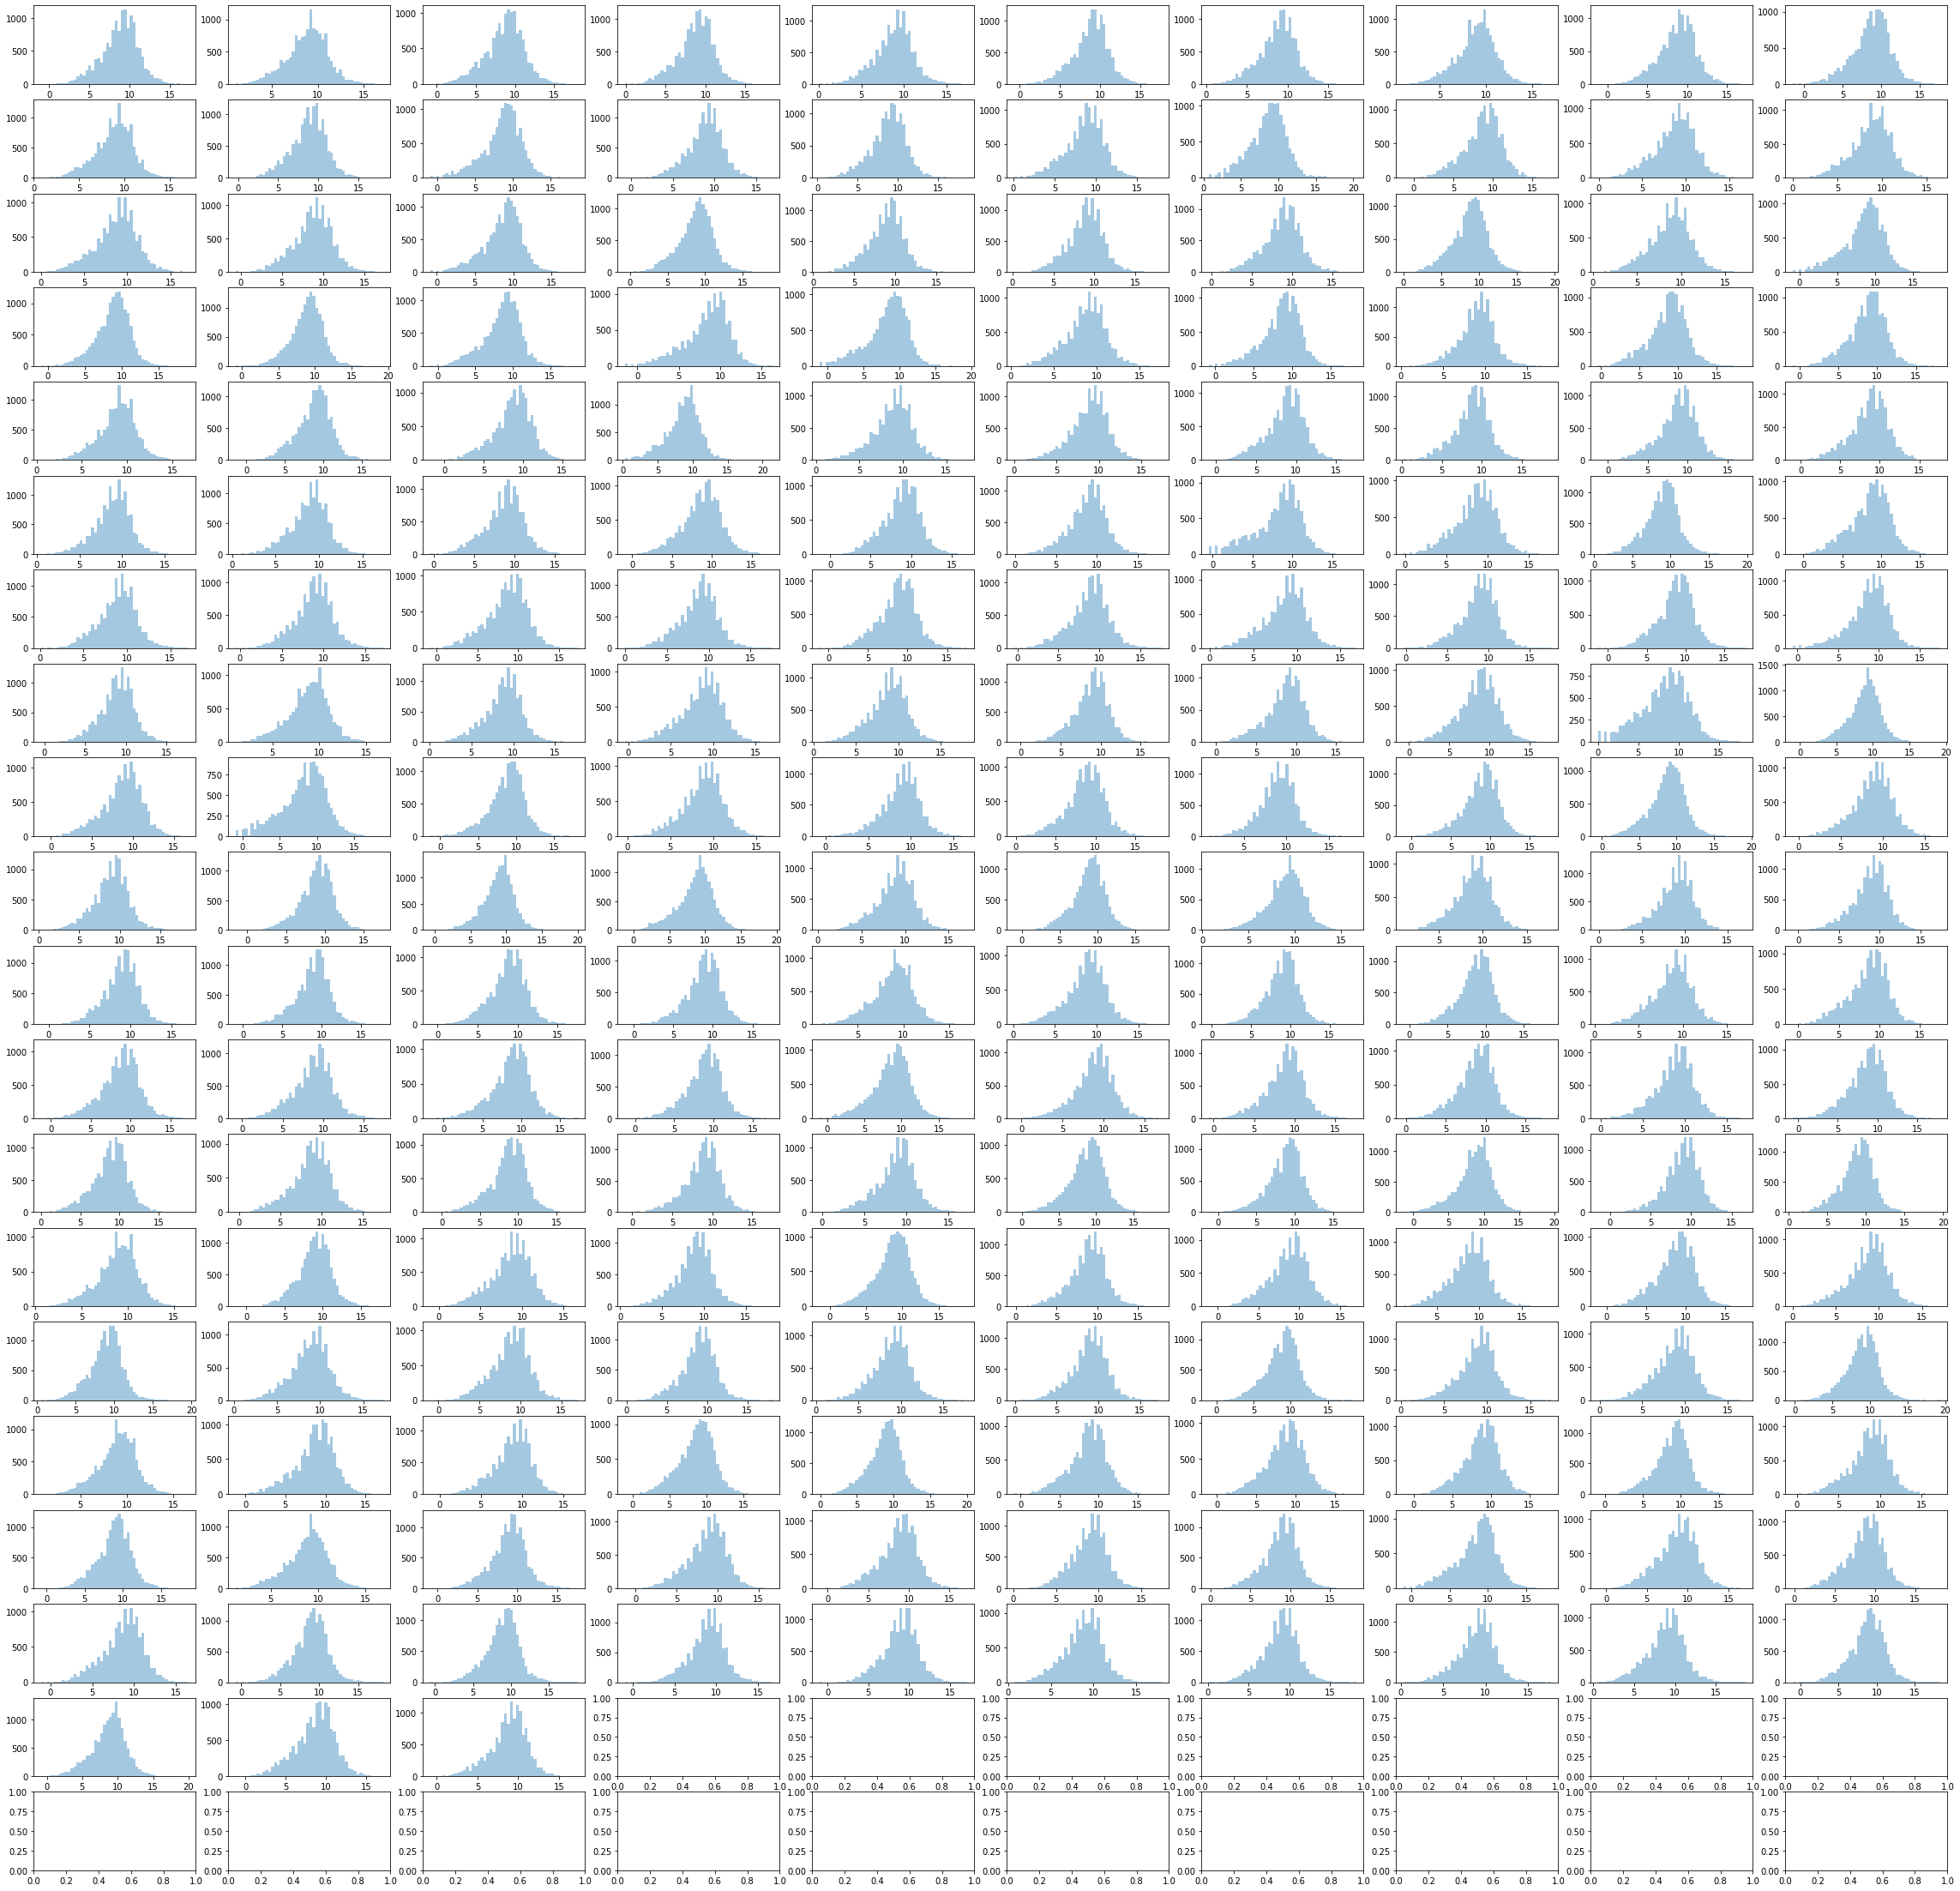

In [12]:
fig, axes = pyplot.subplots(figsize=(40,40),ncols=10, nrows=20)

for i, ax in zip(data_df.columns, axes.flat):
    sns.distplot(data_df[i],kde=False, rug=False, ax=ax)
pyplot.show()

#### Distribution across all samples

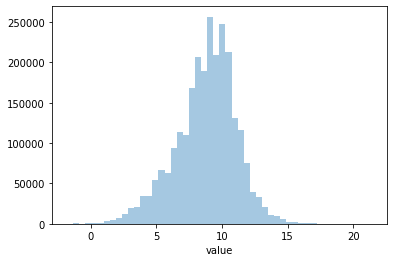

In [13]:
sns.distplot(pd.melt(data_df)['value'],kde=False, rug=False)

In [14]:
np.mean(data_df.values),np.std(data_df.values)

(8.773205, 2.294716)

#### Observations - 
1. From the plots itself, it is clear that almost all samples have identical distributions. From the box plots of values per sample, it is clear that there are minute changes between samples.
2. The overall distribution of values across samples seams to be normal with mean around 8.8 with standard deviation of around 2.3.

### Task 2

In [15]:
## Transposing data 
data_df_transposed = data_df.T

In [16]:
pca_obj = PCA(n_components=2)
pca_obj.fit(data_df_transposed)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
data_transformed = pca_obj.transform(data_df_transposed)
data_transformed = pd.DataFrame(data_transformed)

In [18]:
data_transformed.head()

0          1
0  19.378696 -14.984159
1   6.460954  -7.325129
2  22.105969 -12.286025
3  14.005787 -25.846867
4 -14.081992  -4.000403

In [19]:
data_transformed.index= data_df_transposed.index
data_transformed.columns = ['PCA1','PCA2']

In [25]:
### overlaying histogological type other metadata
data_transformed['histological_type_other'] = obj.col_metadata_df['histological_type_other']
data_df_transposed['histological_type_other'] = obj.col_metadata_df['histological_type_other']



### subset to contain neuroendocrine and adenocarcinoma tumors from histological_type_other column (values containing null and others were dropped)
data_transformed_subset = data_transformed[data_transformed['histological_type_other'].isin(['neuroendocrine','neuroendocrine carcinoma nos','82463 neuroendocrine carcinoma nos','neuroendocrine carcinoma',
                                      'adenocarcinoma, nos','adenocarcinoma- nos'])]

In [26]:
### cleaning histological type other column name for better plot visibility

data_transformed_subset['cleaned_histological_type_other'] = data_transformed_subset['histological_type_other'].apply(lambda x : "neuroendocrine" if "neuroendocrine" in x else "adenocarcinoma")



/Users/aditya/Desktop/environments/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
data_transformed_subset.head()

PCA1        PCA2       histological_type_other  \
cid                                                                             
aaqm-Primary solid Tumor   2.299561  153.309920                neuroendocrine   
a9ij-Primary solid Tumor   5.808765  181.829483  neuroendocrine carcinoma nos   
a9il-Primary solid Tumor -32.635649  137.001073  neuroendocrine carcinoma nos   
a9in-Primary solid Tumor -48.752136  121.576079  neuroendocrine carcinoma nos   
a9io-Primary solid Tumor -17.168359  165.757392  neuroendocrine carcinoma nos   

                         cleaned_histological_type_other  
cid                                                       
aaqm-Primary solid Tumor                  neuroendocrine  
a9ij-Primary solid Tumor                  neuroendocrine  
a9il-Primary solid Tumor                  neuroendocrine  
a9in-Primary solid Tumor                  neuroendocrine  
a9io-Primary solid Tumor                  neuroendocrine

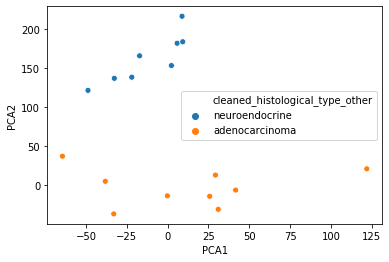

In [68]:
## scatterplot to visualise the two types of tumors
sns.scatterplot(x='PCA1',y='PCA2',data=data_transformed_subset,hue='cleaned_histological_type_other')

In [51]:
pca_obj.explained_variance_ratio_.cumsum()

array([0.17050992, 0.31896947])

#### Observations - 
1. From this plot we can see that the samples are clearly separable.
2. From the explained variance ratio cumulative sum from pca object we can see that the two dimensions are able to explain or characterize about 32% of the data.

In [31]:
## Removing neuroendocrine tumor samples

## samples names where cleaned histological type is adenocarcinoma
adena_samples = data_transformed_subset[data_transformed_subset['cleaned_histological_type_other'] == "adenocarcinoma"].index

#

In [34]:
data_df_transposed_adena = data_df_transposed.loc[adena_samples]

In [35]:
data_df_transposed_adena.head()

rid                       A1BG  A2LD1   A2M  A4GALT  AAAS  AACS  AADAT  AAGAB  \
cid                                                                             
6879-Primary solid Tumor   4.5    6.3  12.9     7.3   9.3  10.2    5.3    9.5   
7289-Primary solid Tumor   5.2    6.3  10.1    10.0  10.0  11.2    1.4   11.0   
8519-Primary solid Tumor   7.9    7.7  14.7     8.4   8.9   9.7    6.6   10.1   
a4bk-Primary solid Tumor   6.7    6.0  14.0     9.5   9.8   9.8    5.7    9.6   
a77p-Primary solid Tumor   6.0    6.6  14.6     9.8   9.3   9.8    6.6   10.0   

rid                       AAK1  AAMP  ...  ZWILCH  ZWINT  ZXDA  ZXDB  ZXDC  \
cid                                   ...                                    
6879-Primary solid Tumor  10.0  11.6  ...     7.9    9.2   5.9   9.9   9.7   
7289-Primary solid Tumor   8.8  11.8  ...     9.1    8.3   5.9   8.8   9.9   
8519-Primary solid Tumor  10.4  11.4  ...     7.9    7.6   6.5   8.8  10.3   
a4bk-Primary solid Tumor   9.8  11.4  ...     7.9    8.5   6.0   8.8  10.1   
a77p-Primary solid Tumor   9.8  11.6  ...     7.9    8.1   6.0   8.6   9.8   

rid                       ZYG11B   ZYX  ZZEF1  ZZZ3  histological_type_other  
cid                                                                           
6879-Primary solid Tumor     9.6  11.8   10.1   9.7      adenocarcinoma, nos  
7289-Primary solid Tumor     8.4  12.3   10.9   9.1      adenocarcinoma, nos  
8519-Primary solid Tumor     9.8  11.5   10.8   9.9      adenocarcinoma, nos  
a4bk-Primary solid Tumor     9.5  12.6   10.3   9.2      adenocarcinoma, nos  
a77p-Primary solid Tumor    10.1  13.1   10.8   9.4      adenocarcinoma, nos  

[5 rows x 14099 columns]

### Task 3

In [37]:
from GSVA import gsva

In [38]:
geneset = []
with open('Copy of type1_IFN.txt','r') as w:
    for line in w:
        geneset.append((line.strip(),"adenocarcinoma "))
        
geneset_df = pd.DataFrame(geneset,columns=['member','name'])

In [40]:
geneset_df['description'] = ""

In [41]:
geneset_df = geneset_df[['description','member','name']]

In [42]:
## Using only adenocarcinoma subsetted dataset

score_df = gsva(data_df_transposed_adena.T,geneset_df,tau=1)

In [43]:
score_df

6879-Primary solid Tumor  7289-Primary solid Tumor  \
name                                                                  
adenocarcinoma                   0.608739                 -0.440756   

                 8519-Primary solid Tumor  a4bk-Primary solid Tumor  \
name                                                                  
adenocarcinoma                   -0.44302                  0.511504   

                 a77p-Primary solid Tumor  a77q-Primary solid Tumor  \
name                                                                  
adenocarcinoma                  -0.552227                  0.659022   

                 a9tj-Metastatic  a9tj-Primary solid Tumor  \
name                                                         
adenocarcinoma         -0.689975                 -0.267372   

                 a77e-Primary solid Tumor  
name                                       
adenocarcinoma                   0.502663

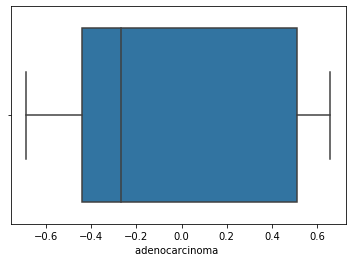

In [44]:
sns.boxplot(score_df.iloc[0])

In [48]:
score_df.iloc[0][score_df.iloc[0]>0]

6879-Primary solid Tumor    0.608739
a4bk-Primary solid Tumor    0.511504
a77q-Primary solid Tumor    0.659022
a77e-Primary solid Tumor    0.502663
Name: adenocarcinoma , dtype: float64

1. A gsva score of greater than 0.5 indicates that genes in the genes set are positively enriched as compared to genes not in the gene set. Therefore the above four samples have IFN signature in them.

In [71]:
##
pancreas_mat = pd.read_csv('Copy of Pancreas_log_tpm_RNAseq_mat.csv',index_col=0)

In [72]:
pancreas_mat

GTEX.111CU.0526.SM.5EGHK  GTEX.111YS.1226.SM.5EGGJ  \
PRSS1                     16.297794                 17.273222   
REG1A                     16.726019                 14.916299   
CPA1                      15.109871                 15.999450   
CLPS                      16.179929                 16.494527   
CELA3A                    14.873204                 15.198867   
...                             ...                       ...   
AMIGO3                     0.000000                  0.000000   
PTTG2                      0.000000                  0.000000   
HIST1H2AD                  0.000000                  0.000000   
GCOM1                      0.000000                  0.000000   
TP53TG3B                   0.000000                  0.000000   

           GTEX.1122O.0726.SM.5GIEV  GTEX.1128S.0826.SM.5GZZI  \
PRSS1                     16.897715                 16.186521   
REG1A                     15.154462                 17.044746   
CPA1                      15.643603                 15.211090   
CLPS                      16.526056                 13.952286   
CELA3A                    15.200017                 14.133383   
...                             ...                       ...   
AMIGO3                     0.000000                  0.000000   
PTTG2                      0.000000                  0.000000   
HIST1H2AD                  0.000000                  0.000000   
GCOM1                      0.000000                  0.000000   
TP53TG3B                   0.000000                  0.000000   

           GTEX.117YX.0226.SM.5EGH6  GTEX.11DXX.0926.SM.5H112  \
PRSS1                     16.867870                 17.052197   
REG1A                     16.195776                 15.274706   
CPA1                      15.570182                 15.926041   
CLPS                      15.956081                 15.360196   
CELA3A                    13.966776                 15.346064   
...                             ...                       ...   
AMIGO3                     0.000000                  0.000000   
PTTG2                      0.000000                  0.000000   
HIST1H2AD                  0.000000                  0.000000   
GCOM1                      0.000000                  0.000000   
TP53TG3B                   0.000000                  0.000000   

           GTEX.11EQ9.1026.SM.5H134  GTEX.11GSP.0426.SM.5A5KX  \
PRSS1                     17.034036                 17.737280   
REG1A                     15.266311                 12.895007   
CPA1                      16.065942                 15.992606   
CLPS                      15.798193                 16.740585   
CELA3A                    14.527172                 15.502801   
...                             ...                       ...   
AMIGO3                     0.000000                  0.000000   
PTTG2                      0.000000                  0.000000   
HIST1H2AD                  0.000000                  0.000000   
GCOM1                      0.000000                  0.000000   
TP53TG3B                   0.000000                  0.000000   

           GTEX.11I78.0626.SM.5A5LZ  GTEX.11LCK.0226.SM.5A5M6  ...  \
PRSS1                     17.416179                 15.871256  ...   
REG1A                     13.989128                 16.304227  ...   
CPA1                      16.406255                 15.380292  ...   
CLPS                      16.452032                 15.005844  ...   
CELA3A                    14.769063                 14.762849  ...   
...                             ...                       ...  ...   
AMIGO3                     0.000000                  0.000000  ...   
PTTG2                      0.000000                  0.000000  ...   
HIST1H2AD                  0.000000                  0.000000  ...   
GCOM1                      0.000000                  0.000000  ...   
TP53TG3B                   0.000000                  0.000000  ...   

           GTEX.ZT9W.0926.SM.57WFS  GTEX.ZTPG.

In [73]:
pathways_pancreas_df = gsva(pancreas_mat,geneset_df)

In [76]:
pathways_pancreas_df.iloc[0].describe()

count    248.000000
mean      -0.024590
std        0.400089
min       -0.761239
25%       -0.384435
50%       -0.071562
75%        0.331355
max        0.784003
Name: adenocarcinoma , dtype: float64

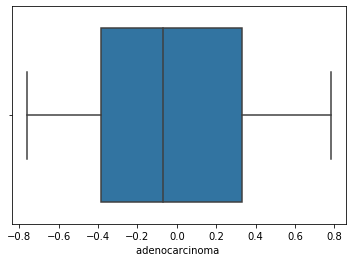

In [77]:
sns.boxplot(pathways_pancreas_df.iloc[0])

In [89]:
pathways_pancreas_df.iloc[0][pathways_pancreas_df.iloc[0]>0].shape

(114,)